## 第3回課題: Keplerの第三法則と最小二乗法
- 前回のノートブック[2-1(NumPyについて)](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture2_tutorial/lecture2-1_numpy.ipynb), [2-2(グラフの作成)](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture2_tutorial/lecture2-2_plot.ipynb)なども参考にしつつ、指示に従ってプログラムを書いてみよう。

In [1]:
# 計算に用いるモジュールの読み込み
# numpy, matplotlib.pyplot が正式名称だが、長いので "as" 以降で省略した名前（このプログラム内で有効）を定義している。
# モジュールについては以下も参照。
import numpy as np
import matplotlib.pyplot as plt

### 組み込み関数とモジュール

[lecture2-1_numpy.ipynb](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture2_tutorial/lecture2-1_numpy.ipynb)で扱ったような配列

In [2]:
a = np.array([1, 2, 3, 4, 5])

を考えよう。これは5つの要素をもつ配列である。配列の要素数は関数 len で取得できる：

In [3]:
len(a)

5

この関数 len は Python に最初から用意されている関数（組み込み関数）なので、ただ len と書けば使える。一方で、平均（mean）を求めるために

In [4]:
mean(a)

NameError: name 'mean' is not defined

とかするとエラーが出る。これは mean という関数が Python には最初から用意されて**いない**ためである。numpy にはこの関数が入っているので、

In [5]:
np.mean(a)

3.0

とするとちゃんと計算できる。必要な関数がどのモジュールに入っているかはやりながら覚えればよい。

### データの読み込み

solar_system.txtには配布した表の太陽系のデータが格納されているので、まずこれをプログラム上で読み込もう。ファイルの読み込みには[副教材4-1](https://utokyo-ipp.github.io/4/4-1.html)のような方法もあるが、ここでは pandas というパッケージを使う。

In [6]:
import pandas as pd

read_csv は、カンマ（,）記号で区切られたCSV（Comma Separated Value）形式のデータを読み込む関数である。comment="#"は、#から始まる行はコメントとして無視することを指示している（ファイルを直接開いて見てみよう）。さらに引数に delimiter="|" などと指定すれば、カンマ以外で区切られたデータ（この例では|）も同様に読めて便利である。ここではカンマ（,）で区切られたデータを扱っているのでこの指定は必要ない。

In [7]:
data = pd.read_csv("solar_system.txt", comment="#")

In [8]:
data

,name,sma_au,eccentricity,inclination_deg,mass_kg,mass_earth,radius_km,radius_earth,period_yr
0,Mercury,0.39,0.2100,7.00,3.300000e+23,0.055,2441,0.38,0.24
1,Venus,0.72,0.0068,3.40,4.900000e+24,0.820,6052,0.95,0.62
2,Earth,1.00,0.0170,0.00,6.000000e+24,1.000,6378,1.00,1.00
3,Mars,1.52,0.0930,1.90,6.400000e+23,0.110,3396,0.53,1.88
4,Jupiter,5.20,0.0480,1.30,1.900000e+27,318.000,71492,11.20,11.90
5,Saturn,9.54,0.0540,2.50,5.700000e+26,95.000,60268,9.40,29.50
6,Uranus,19.20,0.0470,0.77,8.700000e+25,14.500,25559,4.00,84.00
7,Neptune,30.10,0.0086,1.80,1.000000e+26,17.000,24764,3.90,165.00


最初の行はヘッダーとして、上のread_csvの使い方だと列の名前になる。辞書（[副教材3-1](https://utokyo-ipp.github.io/3/3-1.html)）と同様に、列の名前をキーとしてデータを参照できる。例えば

In [9]:
data["name"]

0    Mercury
1      Venus
2      Earth
3       Mars
4    Jupiter
5     Saturn
6     Uranus
7    Neptune
Name: name, dtype: object

でname（惑星の名前）の列が取り出される。ここでは軌道長半径（sma_au）と公転周期（period_yr）の関係を調べたいので、これらの列を配列として取り出しておく。

In [10]:
a = np.array(data["sma_au"])
P = np.array(data["period_yr"])

セルの上部にカーソルを持っていくと "+ コード" や "+ Code" というのが出る。これをクリックして新たなセルを作成し、aと入力して実行することで、aという配列の中身を確かめてみよう。
このように、何か計算をしたら思った通りの中身になっているか確認しながら進めるとよい。

常用対数は numpy の関数 np.log10 で計算できる。例えば

In [11]:
np.log10(3)

0.47712125471966244

### 課題1: 対数の計算

関数 np.log10 を用いて、配列a, Pから$y=\log_{10}(a)$, $x=\log_{10}(P)$の配列を計算しよう。

In [12]:
# aの対数を計算
y = np.log10(a)

In [13]:
# Pの対数を計算
x = np.log10(P)

### 課題2: 最小二乗法の計算

Keplerの第三法則が正しければ、$y$と$x$の関係は1次関数
$$
y = Ax + B
$$
で表されることになる（$A$, $B$は定数）。データの組$(x_1, y_1)$, $(x_2, y_2)$, $\dots$, $(x_N, y_N)$が与えられたとき、定数$A$, $B$は最小二乗法を用いると
$$
\begin{align}
	A &=  {NC - XY \over {NS - X^2}}\\
	B &= {SY - CX \over {NS - X^2}}
\end{align}
$$
のように**データから**推定できる。ここで、
$$
X =  \sum_{i=1}^N x_i, \quad Y = \sum_{i=1}^N y_i, \quad S = \sum_{i=1}^N x_i^2, \quad C = \sum_{i=1}^N x_iy_i
$$
である。

まず $X$, $Y$, $S$, $C$のそれぞれを np.sum() 関数で計算してみよう。

In [14]:
# X, Y, S, C を計算
X = np.sum(x)
Y = np.sum(y)
S = np.sum(x*x)
C = np.sum(x*y)

$N$（データの数）は関数 len() で計算できる。

In [15]:
N = len(x)

最後に式(1), (2)を用いて、$A$, $B$を計算しよう。

In [16]:
den = N * S - X * X # 分母（denominator）は共通
A = (N * C - X * Y) / den 
B = (S * Y - C * X) / den

Aはいくつになったか？　予想される値と一致したか？

In [17]:
print(A, B) # 関数printで明示的に値を書き出せる。ここではただA,Bと書いて実行しても値は見られる。

0.6665410995864587 -0.00010395537604497491


$a^3 \propto P^2$より$a\propto P^{2/3}$なので、傾き$A$は2/3になると予想される。実際そのような値にほぼなっている。

### 課題3: グラフのプロット

[lecture2-2_plot.ipynb](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture2_tutorial/lecture2-2_plot.ipynb)を参考に、matplotlib.pyplot を用いてグラフに$(x_i, y_i) \ (i=1,2,\dots,8)$を点でプロットしよう。

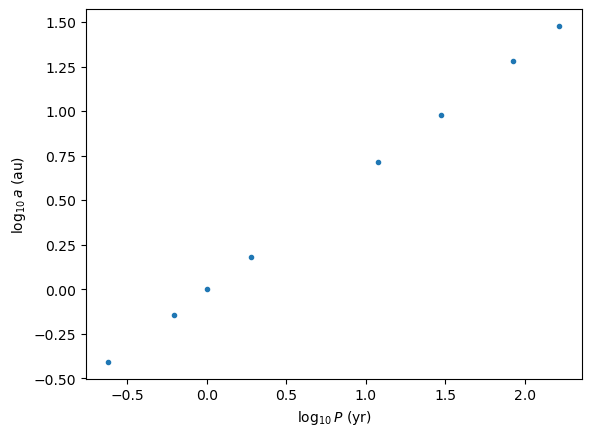

In [18]:
plt.plot(x, y, '.')
plt.xlabel("$\log_{10} P$ (yr)")
plt.ylabel("$\log_{10} a$ (au)");

[lecture2-2_plot.ipynb](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture2_tutorial/lecture2-2_plot.ipynb) で2次関数のプロットでやったのと同様に、np.linspace() を用いて適当な範囲で配列 x0 を定義し、x0 に対して A*x0 + B を線でプロットしよう。これが最小二乗法で計算した直線である。正しくできていればデータ点を通るはずである（確認しよう）。

In [19]:
x0 = np.linspace(-0.7, 2.5, 100) # 上のデータ点が収まるように-0.7から2.5までとった。100は配列の要素数だが、ここでは直線を引くので線でつなげば100以外にしても同じ結果になる。

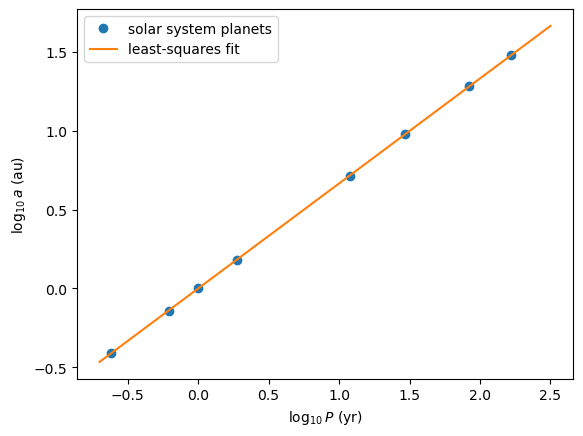

In [20]:
plt.plot(x, y, 'o', label='solar system planets') # マーカーを大きくしてラベルをつけた
plt.plot(x0, A*x0 + B, '-', label='least-squares fit') # 線で表示
plt.xlabel("$\log_{10} P$ (yr)") # $$で囲むと数式が書ける
plt.ylabel("$\log_{10} a$ (au)")
plt.legend(); # 凡例（ラベル）を表示

### 課題4: 関数の作成 （これ以降は余裕があれば）

[副教材3.3](https://utokyo-ipp.github.io/3/3-3.html)も参考に、$x$, $y$の配列を引数とし、$A$, $B$を返り値とする関数を作成してみよう。例えば、x,y を引数としてその和と差を返す関数は以下のように書ける：

In [21]:
def wa_and_sa(x, y):
    wa = x + y
    sa = x - y
    return wa, sa

これで wa_and_sa という名前の関数が定義された。これを使うと例えば以下のように計算できる：

In [22]:
wa_and_sa(2, 1)

(3, 1)

もちろんこの程度ならば関数を作らなくても普通に計算できるが、例えばより大きなプログラムで同じ操作を繰り返し行う場合などは関数としてまとめると便利である。

最小二乗法の関数は、上で行った操作をまとめて例えば以下のように作れる。

In [23]:
def least_squares(x, y):
    """配列x, yから、最小二乗法（least squares）で傾きA, y切片Bを計算する関数"""
    X = np.sum(x)
    Y = np.sum(y)
    S = np.sum(x*x)
    C = np.sum(x*y)
    N = len(x)

    den = N * S - X * X # 分母（denominator）は共通なので一度だけ計算した
    A = (N * C - X * Y) / den 
    B = (S * Y - C * X) / den

    return A, B

### 課題5: 木星の衛星とKeplerの第三法則

CLEのjupiter_satellites.txtは、木星のまわりを公転する衛星の軌道長半径と周期のデータである。このデータについても上と同様な解析を行なってみよう。

In [24]:
d2 = pd.read_csv("jupiter_satellites.txt", comment='#') # 一応最初のデータ（dで定義）を上書きしないように違う文字にした。以下も同様。

In [25]:
a_km, P_days = np.array(d2['semi-major axis (km)']), np.array(d2['orbital period (days)'])

In [26]:
x2, y2 = np.log10(P_days), np.log10(a_km)
A2, B2 = least_squares(x2, y2)
print(A2, B2)

0.6665454301065835 5.460206659261678


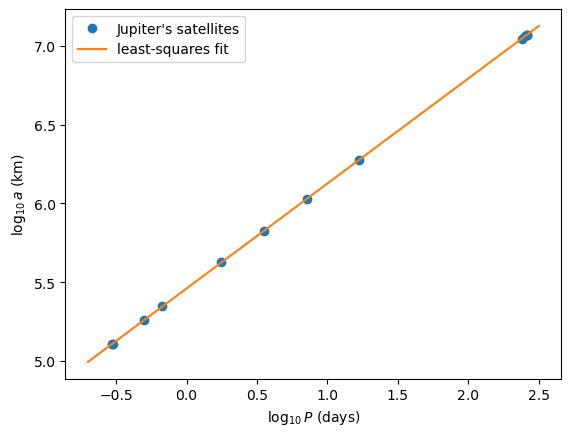

In [27]:
plt.plot(x2, y2, 'o', label="Jupiter's satellites") # 大きくした
plt.plot(x0, A2 * x0 + B2, '-', label="least-squares fit") # 線で表示
plt.xlabel("$\log_{10} P$ (days)")
plt.ylabel("$\log_{10} a$ (km)")
plt.legend(loc="best");

この場合もKeplerの第三法則が成り立っていることがわかる。

### おまけ: 木星と太陽の質量比

太陽系の惑星と太陽、木星の衛星と木星のように、質量の大きい中心天体のまわりをそれに比べて質量の無視できるほど小さい天体が公転している場合、Keplerの第三法則は近似的に
$$
{a^3 \over P^2} = kM
$$
（$k$は定数、$M$は中心天体の質量）と表せる（補足資料PDFも参照）。これより
$$
3\log_{10} a - 2\log_{10} P = \log_{10}k + \log_{10} M
$$
あるいは
$$
\log_{10}a = {2 \over 3}\log_{10} P + {1\over 3}(\log_{10}k + \log_{10} M)
$$
が成り立つ。上で最小二乗法で計算した傾き$A$は$2/3$, y切片$B$は${1\over 3}(\log_{10}k + \log_{10} M)$に対応する。よって、木星-衛星と太陽-惑星とで計算した$B$の差をとると
$$
B_\mathrm{Jupiter} - B_\mathrm{Sun} = {1\over 3}\left(\log_{10} M_\mathrm{Jupiter}- \log_{10} M_\mathrm{Sun}\right) = {1\over 3}\log_{10}\left(M_\mathrm{Jupiter}\over M_\mathrm{Sun}\right)
$$
となり、ここから
$$
{M_\mathrm{Jupiter}\over M_\mathrm{Sun}} = 10^{3(B_\mathrm{Jupiter} - B_\mathrm{Sun})}
$$
を計算すれば木星と太陽の質量比が得られることがわかる。

ただし、実際に計算する場合は$k$の値は$a$,$P$の単位に依存するので、これらの単位を揃える必要があることに注意する。おおよその値として$1\,\mathrm{au}=1.496\times10^{8}\,\mathrm{km}$, $1\,\mathrm{yr}=365.25\,\mathrm{days}$を用いると、木星の衛星について

In [28]:
a_au_jup = a_km / 1.496e8 # au単位に変換
P_yr_jup = P_days / 365.25 # yr単位に変換

より、木星の衛星について

In [29]:
A_jup, B_jup = least_squares(np.log10(P_yr_jup), np.log10(a_au_jup))

In [30]:
B_jup

-1.0066421308196107

となる。太陽系の値は改めて関数least_squaresで計算するとわかるように

In [31]:
A_sun, B_sun = least_squares(np.log10(P), np.log10(a)) # a, Pは最初の方で定義した
print (B_sun)

-0.00010395537604497491


だったので、木星と太陽の質量比はおおよそ

In [32]:
10**(3*(B_jup - B_sun))

0.0009558406002860499

と見積もれる。つまり木星の質量は太陽の約1/1000倍である。ちなみに、木星の半径は太陽の1/10（つまり体積も1/1000）なので、平均密度は同程度の値になっている。